# ML Course 2 - Practice

## Subject

We provide here a data set on the customers of a bank:
- CustomerId = customer id in the information system of the bank
- Surname = surname of the customer
- CreditScore = score attributed by the bank as estimation of capacity to reimburse a loan
- Geography = country of the customer
- Gender = sex of the customer
- Age = age of the customer
- Tenure = loan duration (year)
- Balance = amount of money on main account (\$)
- NumOfProducts = number of products the customer has in the banl
- HasCrCard = tells if the customer owns a credit card
- IsActiveMember = tells if the customer has an active account
- EstimatedSalary = estimated salary of the customer (\$)
- Exited = tells if the customer has left the bank

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_raw = pd.read_csv('bank_churn.csv')
dataset_raw.sample(n=10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4335,4336,15810460,Fanucci,708,Spain,Female,64,5,0.00,3,0,1,112520.07,1
6245,6246,15722083,Ch'ang,591,Spain,Male,39,8,0.00,2,0,0,42392.24,0
4740,4741,15618661,Chidubem,535,France,Male,30,6,103804.97,1,1,1,125710.53,0
8471,8472,15612478,Somadina,525,France,Male,51,10,0.00,3,1,0,171045.35,1
9108,9109,15622470,Yeh,772,Spain,Male,41,10,96032.22,1,1,1,75825.57,0
4472,4473,15683524,Tobenna,660,Germany,Female,23,6,166070.48,2,0,0,90494.72,0
9804,9805,15596136,Folliero,637,France,Female,36,9,166939.88,1,1,1,72504.76,0
9489,9490,15777907,Liang,791,France,Female,33,3,0.00,1,1,1,144413.92,1
5877,5878,15758510,Frolova,474,France,Male,26,6,0.00,2,0,0,152491.22,0
8424,8425,15775703,Lo,702,France,Male,26,2,71281.29,1,1,1,108747.12,1


In [3]:
oo = dataset_raw[['Surname', 'Geography', 'Gender', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]
oo

,Surname,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,France,Female,2,0.00,1,1,1,101348.88,1
1,Hill,Spain,Female,1,83807.86,1,0,1,112542.58,0
2,Onio,France,Female,8,159660.80,3,1,0,113931.57,1
3,Boni,France,Female,1,0.00,2,0,0,93826.63,0
4,Mitchell,Spain,Female,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,France,Male,5,0.00,2,1,0,96270.64,0
9996,Johnstone,France,Male,10,57369.61,1,1,1,101699.77,0
9997,Liu,France,Female,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,Germany,Male,3,75075.31,2,1,0,92888.52,1


The objective of the bank is to predict the churn, i.e. if a customer is likely to leave the bank, based on her profile (estimated salary, geography, age, etc.).
Here, we will prepare the data set so that it can be directly used for ML processing. The work is limited to data exploration and preparation, we will not make ML prediction yet.

Your tasks:
- Make some data exploration with at least three plots of your choice (3 points). Examples: distribution of the values within one feature, repartition of a feature depending on the target value, etc.
- Prepare the data set (7 points). Example: dropping unrelevant data, preparing the predictors and the response, data encoding, train/test split, data scaling.

In [4]:
oo.describe()

,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


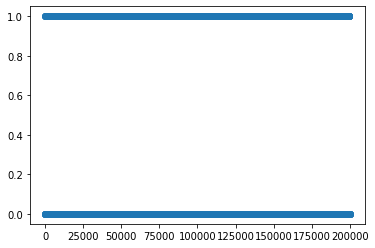

In [5]:
plt.scatter(oo['EstimatedSalary'], dataset_raw['Exited'])

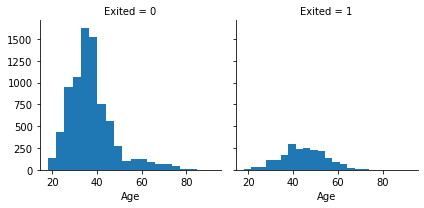

In [6]:
g = sns.FacetGrid(dataset_raw, col='Exited')
g.map(plt.hist, 'Age', bins=20)

In [7]:
from pandas.plotting import scatter_matrix

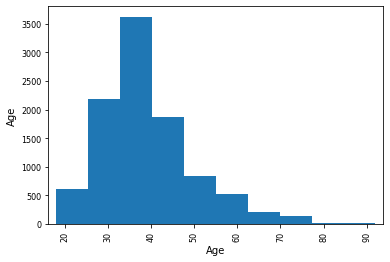

In [8]:
df = pd.DataFrame(dataset_raw['Age'])
scatter_matrix(df, alpha=0.2, bins=10);

In [9]:
dataset_raw.shape

(10000, 14)

In [10]:
oo['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

D:\AnacondaPython\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


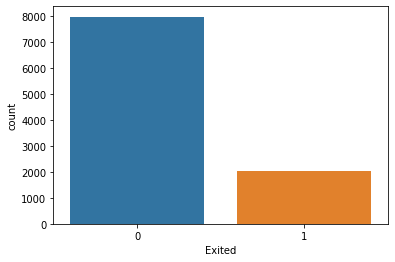

In [11]:
sns.countplot(oo['Exited']);

<font size = "5">**Count of Churned by Sex**<font>

In [12]:
male=len(oo[(oo['Exited']==1) & (oo['Gender']=='Male')]) 

male

898

In [13]:
female=len(oo[(oo['Exited']==1) & (oo['Gender']=='Female')])
female

1139

In [14]:
newdata = oo[["Gender", "Exited"]].groupby(['Gender'], as_index=False).count()
newdata

,Gender,Exited
0,Female,4543
1,Male,5457


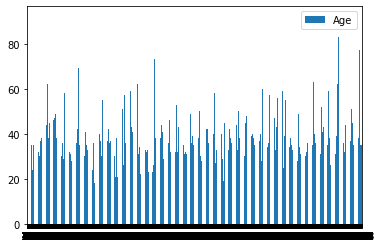

In [17]:

ax = pd.DataFrame({'Exited', 'Gender'})


x = df.plot.bar(rot=0)


<AxesSubplot:>

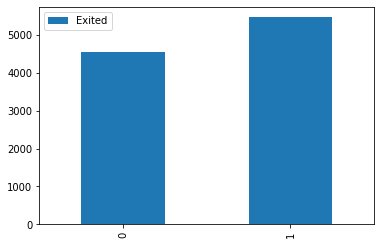

In [28]:
newdata.plot(kind='bar')

D:\AnacondaPython\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

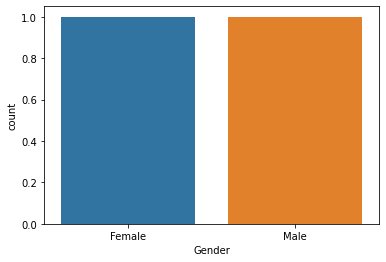

In [18]:
sns.countplot(newdata ['Gender'] )

<font size = "5">**Count of Chrun Grouped by Gender**</font>

<AxesSubplot:xlabel='Gender', ylabel='count'>

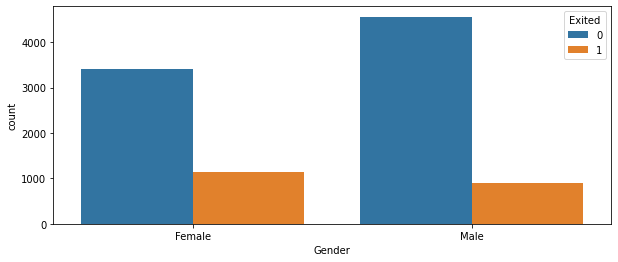

In [19]:
plt.subplots(figsize=(10,4))
sns.countplot(x="Gender", hue = 'Exited', data= dataset_raw)

<AxesSubplot:xlabel='Age', ylabel='count'>

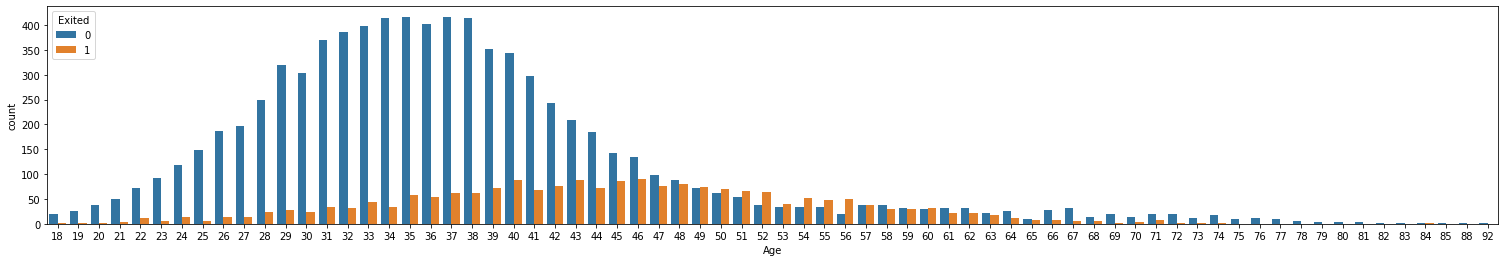

In [20]:
plt.subplots(figsize=(26,4))
sns.countplot(x="Age", hue = 'Exited', data= dataset_raw)

<font size = "5">**Separation of Gender, Age and Churn count**<font>

D:\AnacondaPython\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


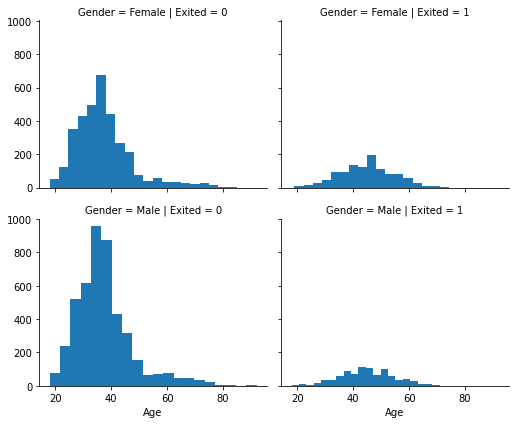

In [21]:
grid = sns.FacetGrid(dataset_raw, col='Exited', row='Gender', size=3, aspect=1.2)
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend();

<font size = "5">**Relation between different parameter**<font>


The relation between credit score and churn is quite low

In [22]:
oo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [23]:
oo.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [24]:
oo.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<font size = "5">**Exited by Geography**</fonts>

In [25]:
gbm = oo[oo.Exited == 1]
gbm.sort_values(by=['Geography']).head()

,Surname,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,France,Female,2,0.00,1,1,1,101348.88,1
3272,Harriman,France,Female,4,0.00,1,1,1,163365.85,1
7474,Lucchesi,France,Male,4,165438.26,1,1,0,120770.75,1
3274,Pinto,France,Female,6,0.00,1,1,1,16447.60,1
3280,To Rot,France,Female,3,238387.56,1,0,1,147964.99,1


<AxesSubplot:>

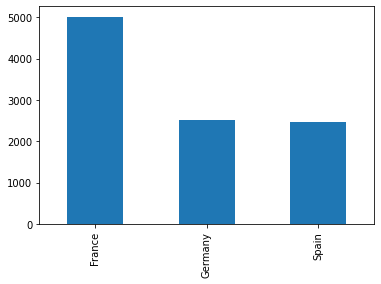

In [26]:
oo.Geography.value_counts().plot(kind='bar', stacked =True)

In [31]:
gbn=oo.groupby(['Geography', 'Exited']).size().reset_index().pivot(index = 'Exited', columns='Geography', values=0) 
gbn

Geography,France,Germany,Spain
Exited,,,
0,4204,1695,2064
1,810,814,413


In [32]:
oo.groupby('Geography')

<AxesSubplot:xlabel='Exited'>

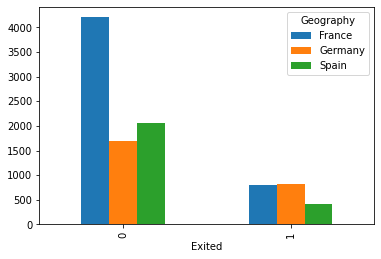

In [33]:
gbn.plot(kind='bar')

In [34]:
gbg=oo.groupby(['Geography', 'Exited', 'Gender']).size()
gbg

Geography  Exited  Gender
France     0       Female    1801
                   Male      2403
           1       Female     460
                   Male       350
Germany    0       Female     745
                   Male       950
           1       Female     448
                   Male       366
Spain      0       Female     858
                   Male      1206
           1       Female     231
                   Male       182
dtype: int64

In [37]:
j= oo.sort_values(by=['Geography', 'Gender', 'Exited'])
j.head()

,Surname,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3,Boni,France,Female,1,0.0,2,0,0,93826.63,0
12,Kay,France,Female,10,0.0,2,1,0,26260.98,0
13,Chin,France,Female,5,0.0,2,0,0,190857.79,0
19,Hao,France,Female,6,0.0,2,1,1,54724.03,0
24,Yen,France,Female,5,0.0,1,1,1,187616.16,0


In [38]:
a = j.groupby(['Gender', 'Exited', 'Geography']).size().reset_index().pivot(index = 'Exited', columns=['Gender', 'Geography'], values=0) 

In [39]:
a

Gender    Female                 Male              
Geography France Germany Spain France Germany Spain
Exited                                             
0           1801     745   858   2403     950  1206
1            460     448   231    350     366   182